In the last class we discussed sampling distributions. We are going to revisit sampling distributions and learn some new stuff along the way. But first, we need some new terminology to help us out. <br>
<br>
1. Experiment. An experiment is also called a trial, and one way we can think about an experiment is that it is the overarching thing we must do to obtain probability. An example of this is rolling a die (we do not know the outcome before hand, but if I want to know what the probability of rolling a $6$ is, I have to roll a die). It can also be something like taking the SAT (assuming the score is random), or picking a sock out of a drawer. <br>
<br>
2. Outcome. So we do an experiment, like rolling a die, and the outcome is the number that we end up rolling. We are finally able to discuss probability when we talk about outcomes. If I want to determine the odds of rolling a $6$, I would write P(rolling a $6$). And, since we know the odds of this happening are $\frac{1}{6}$, I would write P(rolling a $6$) = $\frac{1}{6}$. <br>
<br>
3. Event. One single outcome or a collection of outcomes. It allows us to overlap outcomes too and obtain new probabilities for things. Consider a deck of cards with no jokers. An event could be "picking a card that is red and black at the same time" (has probability $0$), "picking a card that is a heart or spade" ($50\%$ chance), or "picking a card that is not red and not a club" ($\frac{13}{52}$ cards have this property). The main difference is that I can analyze a collection of events all at once for a single experiment, while an outcome is interested only in one property of our experiment. <br>.
<br>
So what's the point of this? Well, first we're going to look at some simulations that use Python code. Then, we're going to attempt to determine the probabilities of certain outcomes or events using this simulated data. This is called Empirical Probability Estimation.

The first example we take a look at is rolling a die. We are going to simulate $10, 100, $ and $10,000$ die rolls and review how the rolls are distributed.

In [52]:
import numpy as np
from numpy import random
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [40]:
samples = np.random.randint(1,7,size = 10)
samples

array([4, 3, 6, 4, 4, 6, 6, 1, 5, 3])

So, we just simulated $10$ die rolls using python. Looking at this data doesn't really tell us much. Let's do some exploratory data analysis and determine some quantities of interest, like the mean, median, and mode of the data.

In [41]:
mean = np.mean(samples)
median = np.median(samples)
mode = stats.mode(samples)[0]
mean,median,mode

(4.2, 4.0, 4)

Awesome! The mean is $4.2$, the median is $4$, and the mode is $4$. This tells me, without even looking at the sample, that we must have rolled a substantial amount of $4$'s, $5$'s and $6$'s to boost the mean above the expected $3.5$. Let's take a look at a histogram of these rolls.

(array([0.1, 0. , 0.2, 0.3, 0.1, 0.3]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

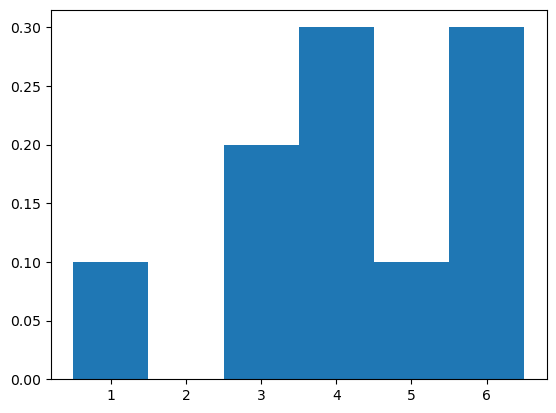

In [46]:
plt.hist(samples,bins=[.5,1.5,2.5,3.5,4.5,5.5,6.5],density = True)

The histogram tells us that $6$ and $4$ are the modes. The distribution is asymmetric, left skewed, and bimodal. This aligns with our intuition from the mean, median, and mode. Let's do this same process for more flips. Eventually, we expect that we will observe a uniform distribution as before.

In [47]:
samples = np.random.randint(1,7,size = 100)
mean = np.mean(samples)
median = np.median(samples)
mode = stats.mode(samples)[0]
mean,median,mode

(3.55, 4.0, 5)

(array([0.18, 0.17, 0.13, 0.13, 0.22, 0.17]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

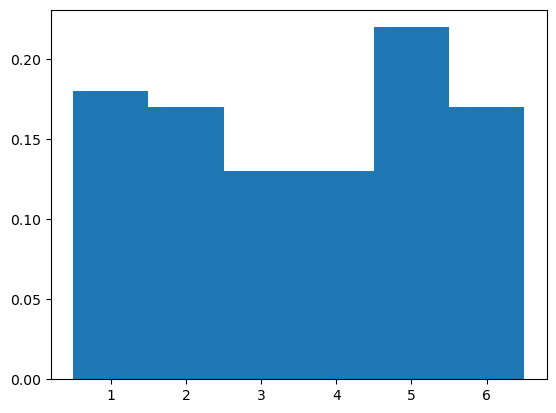

In [48]:
plt.hist(samples,bins=[.5,1.5,2.5,3.5,4.5,5.5,6.5],density = True)

At $100$ we get closer to uniform. But we still have a mode at $5$. Let's see if upping the rolls fixes this.

In [49]:
samples = np.random.randint(1,7,size = 10000)
mean = np.mean(samples)
median = np.median(samples)
mode = stats.mode(samples)[0]
mean,median,mode

(3.4808, 3.0, 3)

(array([0.1692, 0.1686, 0.1702, 0.1625, 0.1632, 0.1663]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

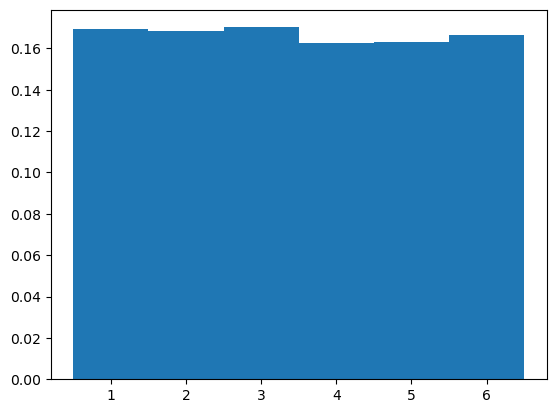

In [50]:
plt.hist(samples,bins=[.5,1.5,2.5,3.5,4.5,5.5,6.5],density = True)

And that's basically good enough. So while it's hard to think about what a distribution is in the abstract, when we go and simulate a bunch of dice rolls, we see that it converges (gets closer and closer to) the true distribution which is a straight line. Now, we note that the uniform distribution has no mode. But when we go and take a sample, we can clearly tell what the mode is. Also, the median will almost never be 3.5, it will be either 3 or 4 when we do this die rolling experiment. Weird! <br>
<br>
Now, we're going to do the same thing with SAT scores. SAT scores are normally distributed with mean $1060$ and standard deviation $195$. Here's what that looks like, theoretically:

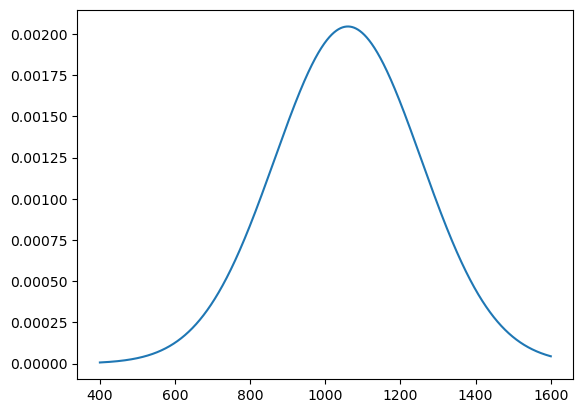

In [53]:
x = np.linspace(400,1600,100000)
plt.plot(x,norm.pdf(x,1060,195))

Here's what happens actually:

(array([  28.,   97.,  451., 1193., 1960., 2456., 2019., 1180.,  447.,
         131.]),
 array([ 400.,  520.,  640.,  760.,  880., 1000., 1120., 1240., 1360.,
        1480., 1600.]),
 <BarContainer object of 10 artists>)

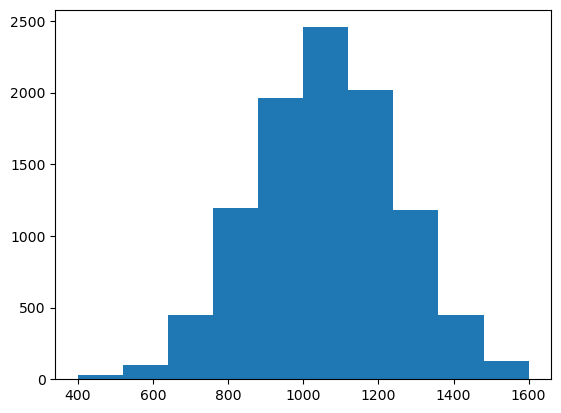

In [56]:
samples = np.random.normal(1060,195,10000)
plt.hist(samples,range=[400,1600])

And so we see that when we use $10,000$ samples from a normal distribution, we approximate the distribution of the scores pretty well. <br>
<br>
And this is how distributions were discovered. Scientists took some data of interest, plotted it (they used something called the "relative likelihood" to make sure the conditions of a probability distribution were met), and attempted to discover the equations that underly such distributions. You may think it is hard to discover these things, but since "normal" is symmetric, we needed only to find a function that was symmetric about a mean and could be scaled with the standard deviation. Let's see how this plot changes when we change the standard deviation of the scores.

(array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.188e+03, 7.712e+03,
        1.098e+03, 1.000e+00, 0.000e+00, 0.000e+00]),
 array([ 400.,  520.,  640.,  760.,  880., 1000., 1120., 1240., 1360.,
        1480., 1600.]),
 <BarContainer object of 10 artists>)

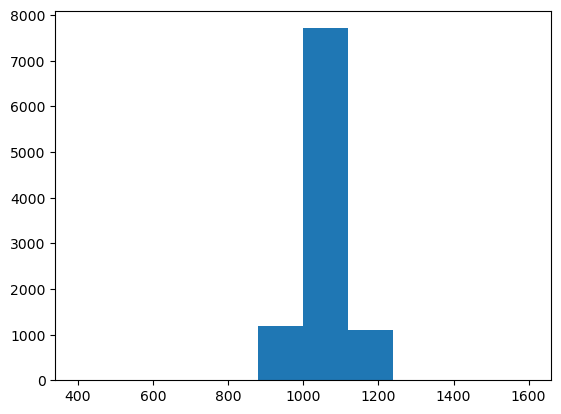

In [57]:
samples = np.random.normal(1060,50,10000)
plt.hist(samples,range=[400,1600])

(array([336., 437., 444., 488., 502., 487., 487., 497., 449., 428.]),
 array([ 400.,  520.,  640.,  760.,  880., 1000., 1120., 1240., 1360.,
        1480., 1600.]),
 <BarContainer object of 10 artists>)

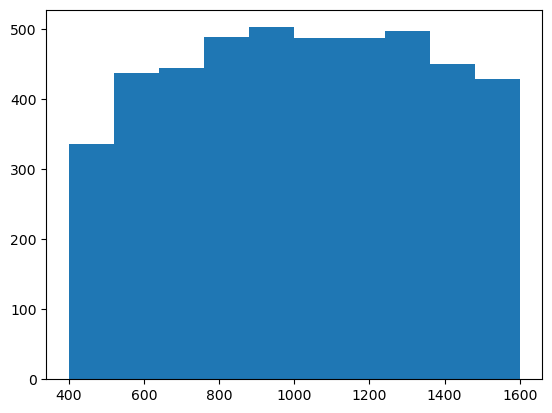

In [58]:
samples = np.random.normal(1060,1000,10000)
plt.hist(samples,range=[400,1600])

When we decrease the standard deviation, the samples get a lot tighter spaced around the mean. When we jack up the standard deviation to $1000$, only a few samples fall between our score range of $400-1600$. so really this is the whole point of thinking about distributions.

Now, we're going to move on to some probability stuff. We're going to use a coin flip example, then discuss what Bayes law is and how to use it. <br>
We know that the probability of flipping a coin heads is $.5$, and the probability of flipping a coin tails is $.5$. So we can write this as <br>
P(flipping heads) = $.5$, P(flipping tails) = $.5$. These are outcomes. If we consider the following events, then these probabilities also hold: <br>
P(flipping heads and tails) = $0$, P(flipping heads or tails) = $1$. <br>
If an event has probability $0$, we say it is impossible. If an event has probability $1$, we say it happens almost certainly. <br> 

Exercise 1: Simulate $10,000$ coin flips using np.random.binomial(n,p,size) (hint: n and p are the probabilities) <br>
2. Plot a histogram of this data. <br>
3. Is your coin fair? Explain why or why not.

We're now going to talk about conditional probability. It's good that we talk about it now because it will come up again later. Consider two outcomes $A,B$. We write <br>
$P(B|A)$, which means the probability that $B$ occurs given that $A$ already happened. Analagously, we write $P(A|B)$ to denote the probability that $A$ occurs given $B$. The easiest way (for me) to see this in action is with marbles. Suppose that we have a bag with $10$ red marbles, $10$ green marbles, and $15$ blue marbles. Additionally, suppose my outcomes are $A$ is drawing a red marble and $B$ is drawing not a green marble. Then let's consider $P(A)$ first. The odds of drawing a red marble are $\frac{10}{35}$. After we draw a marble we take it out of the bag. So now we go to $P(B|A)$. The first marble we drew was red (not a green marble), so we have one less non-green marble to draw now. This means that the probability of drawing a green marble is $\frac{10}{34}$, and so $P(B|A) = \frac{24}{34}$. <br>
<br>
Exercise: calculate P(A|B). (Hint: We can write $P(A|B) = P(A\cap B)/P(B)$, where $A\cap B$ is the events that are in both $A$ and $B$.